In [3]:
import pandas as pd
import numpy as np
import sklearn
from matplotlib import pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('datasets/Student_Marks.csv')
df

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299
...,...,...,...
95,6,3.561,19.128
96,3,0.301,5.609
97,4,7.163,41.444
98,7,0.309,12.027


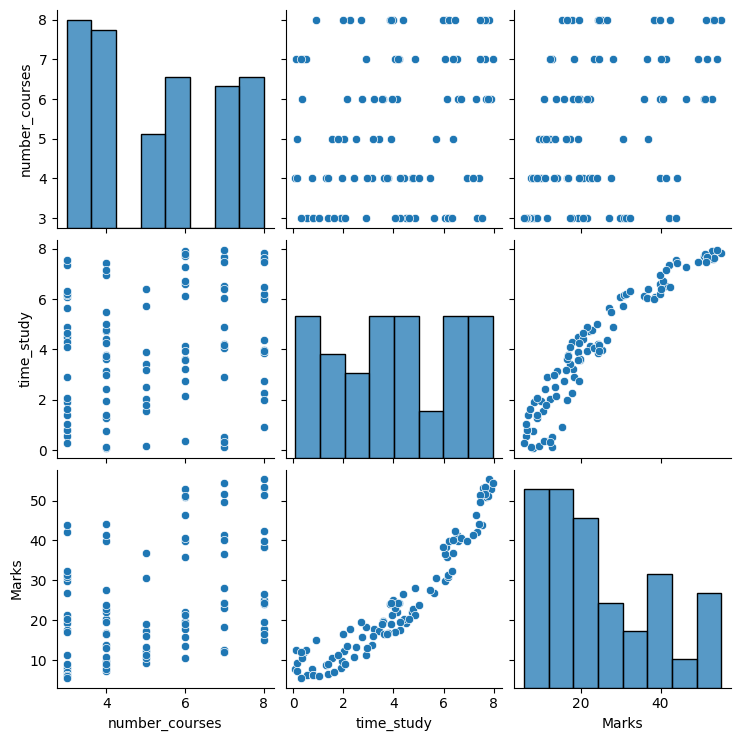

In [8]:
sns.pairplot(df)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [13]:
df.describe()

,number_courses,time_study,Marks
count,100.000000,100.000000,100.000000
mean,5.290000,4.077140,24.417690
std,1.799523,2.372914,14.326199
min,3.000000,0.096000,5.609000
25%,4.000000,2.058500,12.633000
50%,5.000000,4.022000,20.059500
75%,7.000000,6.179250,36.676250
max,8.000000,7.957000,55.299000


<AxesSubplot: >

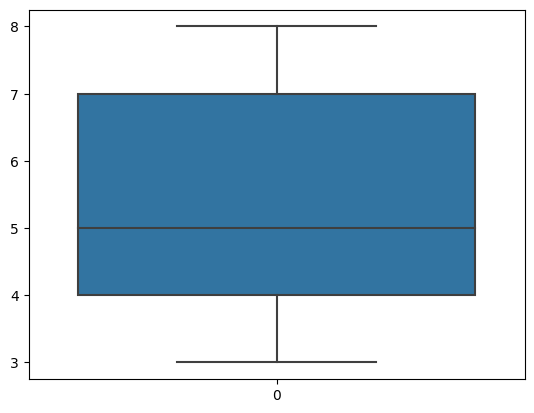

In [15]:
sns.boxplot(df['number_courses'])

<AxesSubplot: >

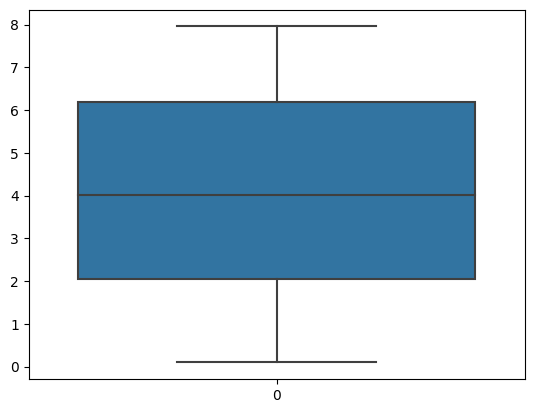

In [17]:
sns.boxplot(df['time_study'])

In [19]:
X = df.drop('Marks', axis=1)
X

,number_courses,time_study
0,3,4.508
1,4,0.096
2,4,3.133
3,6,7.909
4,8,7.811
...,...,...
95,6,3.561
96,3,0.301
97,4,7.163
98,7,0.309


In [20]:
y = df['Marks']
y

0     19.202
1      7.734
2     13.811
3     53.018
4     55.299
       ...  
95    19.128
96     5.609
97    41.444
98    12.027
99    32.357
Name: Marks, Length: 100, dtype: float64

In [18]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=54)

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lr_model = LinearRegression()

In [26]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [27]:
lr_model.coef_

array([1.86488309, 5.38793216])

In [28]:
lr_model.intercept_

-7.1974375588612425

In [29]:
y_predicted = lr_model.predict(X_test)

In [31]:
y_predicted

array([16.24270158, 20.39140934, 28.75820941, 28.83693329, 19.90912971,
       20.7200732 , 41.05610485,  7.26101868, 20.39613871, 13.17762675,
       41.13219447, 27.34722975, 22.43068196, 12.74317994, 22.68600987,
       38.01467685, 23.17828739,  1.3605744 , 47.95870451, 39.51988562])

In [32]:
y_test

36    13.119
70    16.606
48    26.882
94    24.451
81    17.705
46    16.703
38    41.358
29     8.837
34    17.171
22    12.209
85    39.957
92    23.916
91    19.564
32    15.038
0     19.202
10    42.036
95    19.128
67     6.185
59    51.343
33    39.965
Name: Marks, dtype: float64

In [34]:
loss = y_test - y_predicted
loss

36   -3.123702
70   -3.785409
48   -1.876209
94   -4.385933
81   -2.204130
46   -4.017073
38    0.301895
29    1.575981
34   -3.225139
22   -0.968627
85   -1.175194
92   -3.431230
91   -2.866682
32    2.294820
0    -3.484010
10    4.021323
95   -4.050287
67    4.824426
59    3.384295
33    0.445114
Name: Marks, dtype: float64

In [36]:
from sklearn.metrics import mean_absolute_error , mean_squared_error

In [38]:
mae = mean_absolute_error(y_test, y_predicted)
mse = mean_squared_error(y_test, y_predicted)
rmse = np.sqrt(mse)

mae, mse, rmse 

(2.7720740285276233, 9.401621504042694, 3.0662063701001427)

In [39]:
df['Marks'].mean()

24.417689999999997

In [40]:
from sklearn.metrics import r2_score

In [43]:
r2 = r2_score(y_test, y_predicted)
r2

0.9380287498983413

In [44]:
n=len(X_test)
m=3
r2_adj =1-((1-r2)*(n-1)/(n-m-1))
print("R2 Adjusted: ",r2_adj)

R2 Adjusted:  0.9264091405042802


In [45]:
final_model = LinearRegression()

In [46]:
final_model.fit(np.array(X), y)

LinearRegression()

In [47]:
from joblib import dump
dump(final_model, 'my_model.joblib')

['my_model.joblib']

In [48]:
from joblib import load
loaded_model = load('my_model.joblib')

In [59]:
number_courses = 4
time_study = 5
test_input = np.array([[number_courses, time_study]])

In [58]:
loaded_model.predict(test_input)

array([21.40359845])

In [52]:
df

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299
...,...,...,...
95,6,3.561,19.128
96,3,0.301,5.609
97,4,7.163,41.444
98,7,0.309,12.027
